<a href="https://colab.research.google.com/github/SR2090/Image-Classification-MNIST/blob/main/ImageClassification_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Hello world" example in image classification used to be a dataset called MNIST which stood for Modified National Institute of Standards and Technology database.

Fashion MNIST the training set consists of 60,000 images and the test set consists of 10,000 images.

< Will have to add Image>


The dataset has 10 labels assigned to 10 classes

< Will have to add image >




## 1 .The Model
28 x 28 image is reshaped into a single array of size 784. This is done since the input layer is of raw pixel values.

We will use a network with 2 hidden layer having 512 neurons each.

The output layer will have 10 layers for each of the fashion items.

## 2. Load the Data
The dataset loader is already present in keras, if not present in the computer then it will be downloaded. 
The data is loaded using the function fashion_mnist.load_data() if not present locally it will download from server.

The data is divided into tuples of train set and the test set.


In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 3. Checking out the data
Data is 60k images of fashion items along with their ground truth (proper labels). It has 50k images for training, 10k for testing 

Labels
Each training and test example is assigned to one of the following labels:

Label Description

0 -> T-shirt/top
1 -> Trouser
2 -> Pullover
3 -> Dress
4 -> Coat
5 -> Sandal
6 -> Shirt
7 -> Sneaker
8 -> Bag
9 -> Ankle boot



In [47]:
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [3]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
classes = np.unique(train_labels)
nClasses = len(classes)

print('Total Number of outputs ', nClasses)
print('Output classes : ', classes)

Total Number of outputs  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


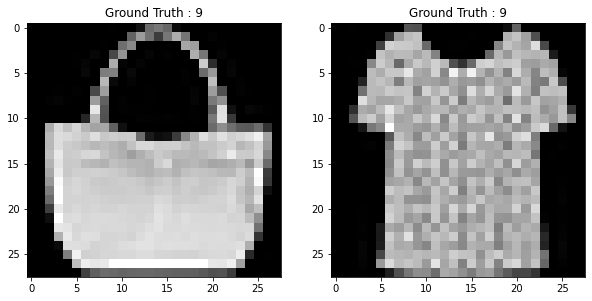

In [5]:
plt.figure(figsize=[10,5])
 
# Display the 100 image in training data
plt.subplot(121)
plt.imshow(train_images[100,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]));
 
# Display the 1000 image in testing data
plt.subplot(122)
plt.imshow(test_images[1000,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]));

## 4. Process the data
Images are grayscale and the pixel values range from 0 to 255

- Convert each image matrix ( 28x28 ) = 784
- reshape the image into 784,1 vector

- Convert data type 

In [6]:
# for product of 28 x 28
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [7]:
# Convert data type from int to float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [8]:
train_data /= 255
test_data /= 255

## 4.1 Convert the lables into categorical encoding
- required by keras for multiclass classification
- converts integer value to boolean value (booean representation of integer data)
- converts integer to an array of all zeros except 1 at the index of the integer
- one hot encoding for 10 classes the integer 5 will be encoded as 0000100000



In [9]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [10]:
print('Original Label', train_labels[0], train_labels[1], train_labels[2])
print('One hot converted label', train_labels_one_hot[0],train_labels_one_hot[1],train_labels_one_hot[2])

Original Label 9 0 0
One hot converted label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 5. Training

## 5.1 Creating the network
- Sequential modle
- will use dense layer(fully connected layer) since we are building a feed forward neural network for image classification
- current layer is completely connected to all the neurons in the previous layer
- Apart from dense layer we will add ReLu activation function(to get the output) ("introduce non linearity into the function")
- Non liearity will help the network learn  non linear decision boundaries 
- In the end we will use softmax layer as it is a multiclass classification problem.
- for binary classification use sigmoid

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
print(dimData, (dimData,))

784 (784,)


In [21]:
nClasses

10

In [22]:
model = Sequential()
# First layer
model.add(Dense(512, activation='relu', input_shape = (dimData,)))
# Second Hidden layer
model.add(Dense(512, activation='relu'))
# Output layer
model.add(Dense(nClasses, activation='softmax'))

## 5.2 Model Configuration
  - Optimizer : 'rmsprop'
  - loss : 'categorical_crossentropy' used for multiclass classification
  - metrics ( accuracy in this case ) which we want to track during the training process.

In [23]:


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 5.3 Training the model

 fit() function in Keras
 number of epochs 20 entire training data will be passed through the model 20 times 

In [25]:
train_data.shape
train_labels_one_hot.shape

(60000, 10)

In training neural network we divide the data into training set, test set and validation set. Training set 60% of data, test set 20% of the data and the validation set 20% of the data.

We report accuracy using validation set.

Validation set is being indirectly used it influences how we set the paramerters. It is not pure and hence we cannot get ourself the final accuracy. hence we have a seperate set called the test set on which we report the accuracy.

The first cell shows model generated using the following parameters

model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=True, validation_data=(test_data, test_labels_one_hot))

In [30]:
# history_1 = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=True, validation_data=(test_data, test_labels_one_hot))

In [36]:
history = model.fit(train_data, train_labels_one_hot, batch_size=32, epochs=10, verbose=True, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2520 - accuracy: 0.9424 - val_loss: 1.8605 - val_accuracy: 0.8840
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2518 - accuracy: 0.9431 - val_loss: 1.8605 - val_accuracy: 0.8876
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2501 - accuracy: 0.9444 - val_loss: 1.8444 - val_accuracy: 0.8860
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2477 - accuracy: 0.9431 - val_loss: 1.8634 - val_accuracy: 0.8885
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2331 - accuracy: 0.9436 - val_loss: 1.9137 - val_accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2399 - accuracy: 0.9464 - val_loss: 2.1406 - val_accuracy: 0.8860
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2351 - accuracy: 0.9462 - val_loss: 2.3373 - val_accuracy:

## 5.4 Evaluate the model

Check performance on the whole data using using evaluate() method.

In [31]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot, verbose=True)

313/313 [==============================] - 1s 2ms/step - loss: 1.1440 - accuracy: 0.8869


In [32]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 1.1439570188522339, accuracy = 0.886900007724762


## 6. Testing Overfitting 

- how do we check if we are overfitting
  - loss vs epoch
  - by plotting training vs validation loss
  - if the training loss doesn't come down then we are going to increase the learning rate
  - The validation loss must come down like the training loss 
  - INCASE OF OVERFITTING
    - The validation will not decrease with the epoch 
    - for accuracy vs epoch the training accuracy will increase as the model is taking into account the extra noise while the validation accuracy will stagnate

In [34]:
# use data in the history object to plot the loss and accuracy of the curve to check how well traing process went.
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy Curves')

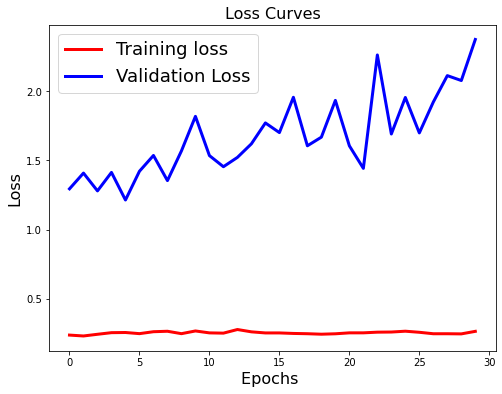

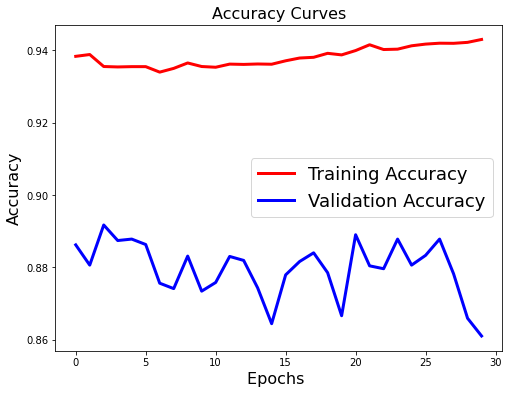

In [35]:
# fit function returns a history object which has a dictionary of all 
# metrics which were required to be tracked during training 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## 7. How to deal with Overfitting ?
  - Add regularization to the model
  - Tell the training process that training data has noice
  - Use dropout layer
    - This layer will randomly select fraction of neurons and turn them off during an epoch of the training process.
    - In case of keras we add a dropout layer right after the fully connected layer

"
Overfitting occurs mainly because the network parameters are getting too biased towards the training data. We can add a dropout layer to overcome this problem to a certain extent. In case of dropout, a fraction of neurons is randomly turned off during the training process, reducing the dependency on the training set by some amount.
"

In [38]:
from tensorflow.keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

## 8. Check performance after regularization
- We will train the network again in the same way we did earlier and check the loss and accuracy curves.


In [44]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# To see detail output, change verbose to True
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=True, 
                            validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.7926 - accuracy: 0.8025 - val_loss: 0.7498 - val_accuracy: 0.8440
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6799 - accuracy: 0.8148 - val_loss: 0.7217 - val_accuracy: 0.8522
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6439 - accuracy: 0.8216 - val_loss: 0.7184 - val_accuracy: 0.8491
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6357 - accuracy: 0.8202 - val_loss: 0.7415 - val_accuracy: 0.8488
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6119 - accuracy: 0.8266 - val_loss: 0.7160 - val_accuracy: 0.8467
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.5948 - accuracy: 0.8311 - val_loss: 0.7377 - val_accuracy: 0.8575
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.5958 - accuracy: 0.8317 - val_loss: 0.7160 - val_accuracy: 0.8583
Epoch 

Text(0.5, 1.0, 'Accuracy Curves')

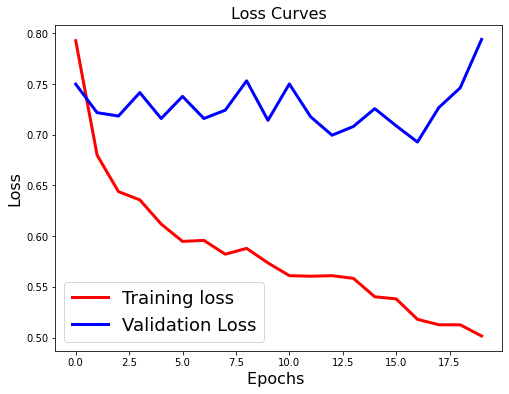

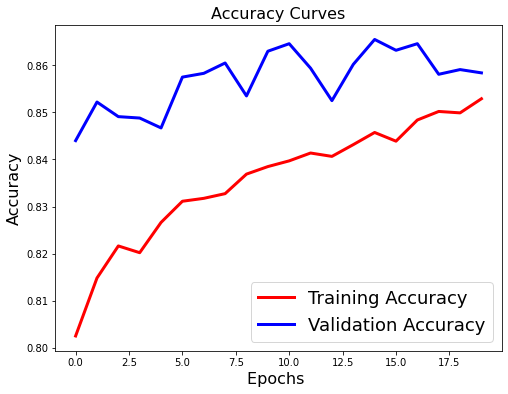

In [45]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## 9. Drawing inference on a single image

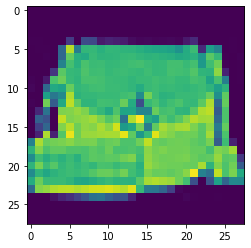

In [40]:
testSample = test_images[9673,:,:]
plt.imshow(testSample)

## 9.1 Get predicted class
## 9.2 Get probabilities

In [50]:
# 9.1
# Predict the Class
# Predict the most likely class
label = model_reg.predict_classes(test_data[[9673],:])[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

Label = 8, Item = Bag


In [52]:
# 9.2
# Predict the probabilities for each class 
prob = model_reg.predict(test_data[[9673],:])
labelProb = prob[0][label]
print("Probability = {:.3f}".format(labelProb))

Probability = 0.998


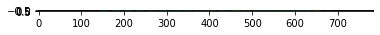

In [63]:
plt.imshow(test_data[[9673],:])